In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('cardio_train.csv',delimiter=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data.shape

(69301, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# From the above two observations we have noticed that there are no null values and no categorical/object features  

# Converting age column from days into years

In [7]:
def age_to_year(value):
    value=value/365
    return value

In [8]:
data['age']=np.floor(data['age'].apply(age_to_year)).astype('int')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


In [9]:
data.drop(columns=['id'],inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
3,39,2,165,85.0,120,80,1,1,1,1,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0


# EXPLORATORY DATA ANALYSIS

In [10]:
#since all of them are numeric data types. we should first categorize them into discrete and continuos variables 
#and then see their reltionship with the dependent variabels.since no. of features are less and prominent 
#i can manually select the discrete features
discrete_features=['cholesterol','gluc','smoke','alco','active','cardio','gender']
continuous_features=['age','height','weight','ap_hi','ap_lo']                    

In [11]:
data.describe()[['age','height','weight','ap_hi','ap_lo','cholesterol','gluc']]

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,52.840681,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447
std,6.766685,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246
min,29.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000


In [12]:
# The mean of age,heoght,weight,ap_hi,ap_lo choloestrol,glucose are 52.84 years,164.36 cm,74.20 kg,128 mmHg,96.65 mHg
#and both cholesterol and glucose seem to be  just above normal
#Systolic and Diastolic mena show that most of the pressure have normal bloodpressure

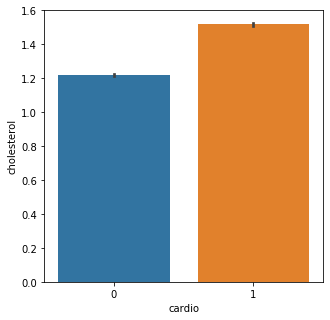

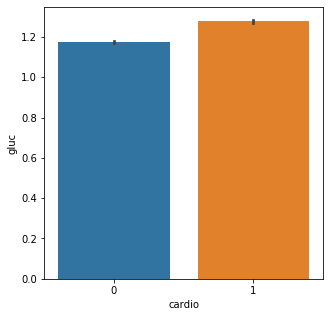

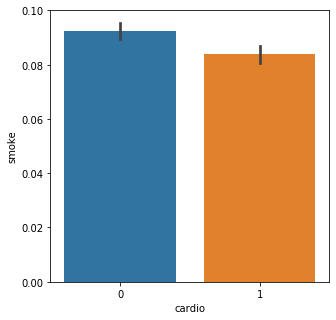

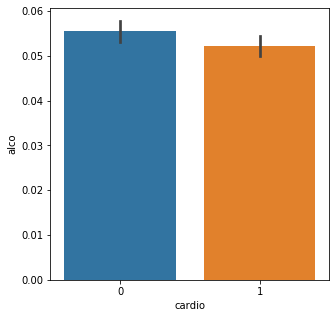

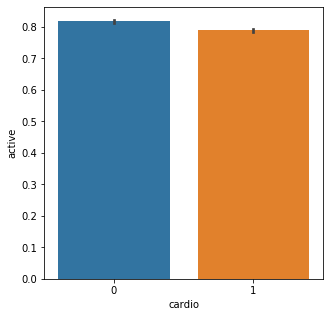

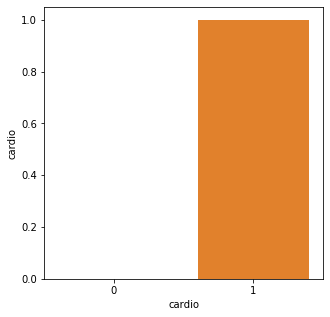

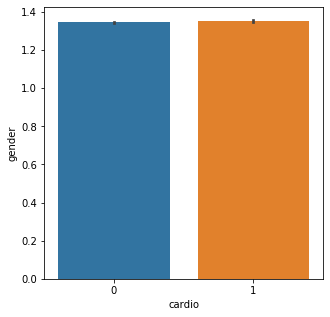

In [13]:
for feature in discrete_features:
    dataset=data.copy()
    plt.figure(figsize=(5,5))
    sns.barplot(x='cardio',y=feature,data=dataset)

# It can be seen from the above plots that gender has absolutely no effect on the dataset. an astonishing fat cn be seen that there is something different about the smoke vs cardio graph where else it should have been vice versa. Others are as expected.

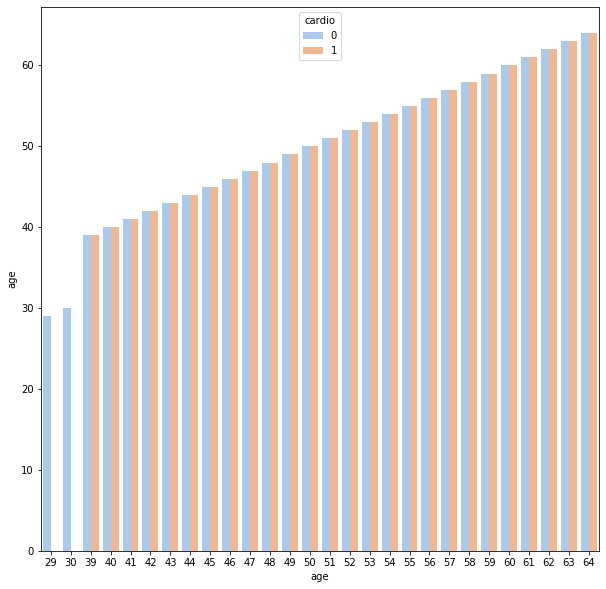

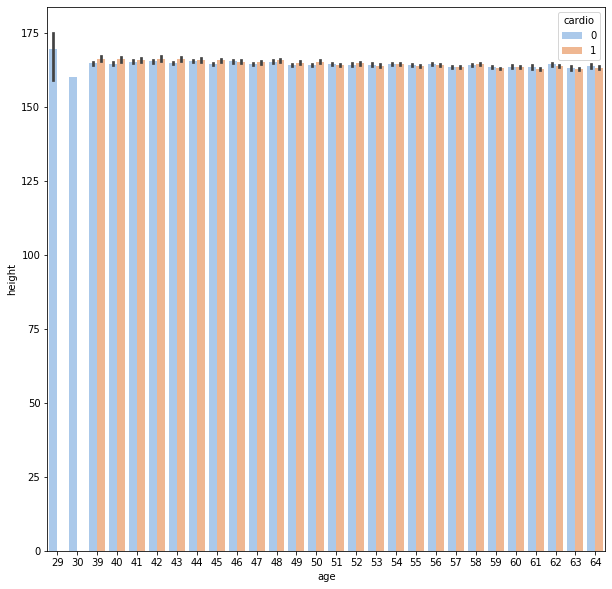

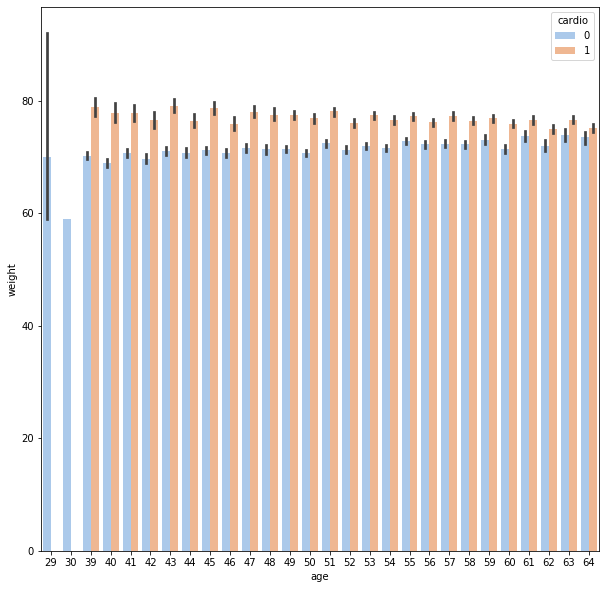

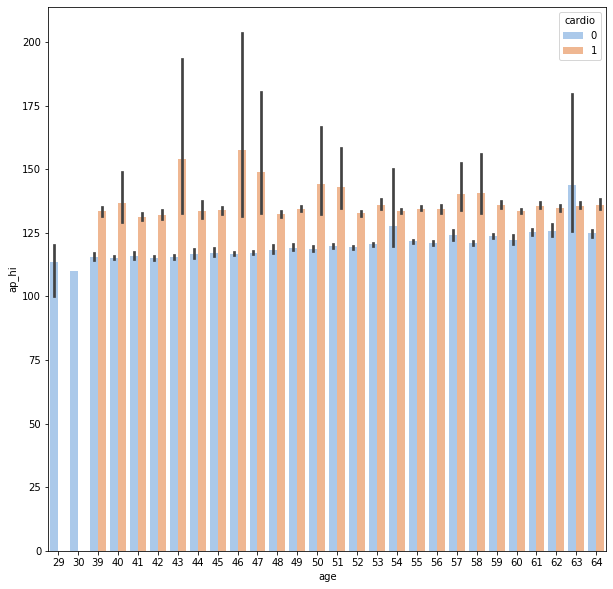

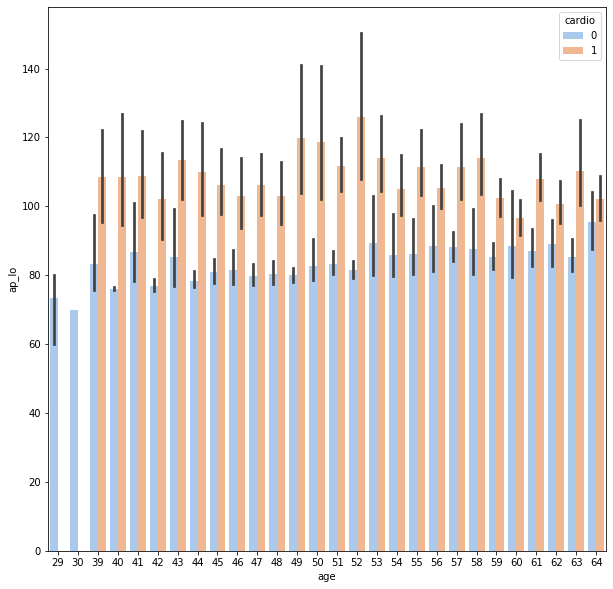

In [15]:
for feature in continuous_features:
    dataset=data.copy()
    plt.figure(figsize=(10,10))
    sns.barplot(x='age',y=feature,data=dataset,hue='cardio',palette='pastel',color=["dusty purple","amber"])

# here it is observed that height  little effect on the cardio feature

In [18]:
#let us now see how cholestrol types are related to the weight and blood pressure of the person.Then we'll see the same for glucose. 

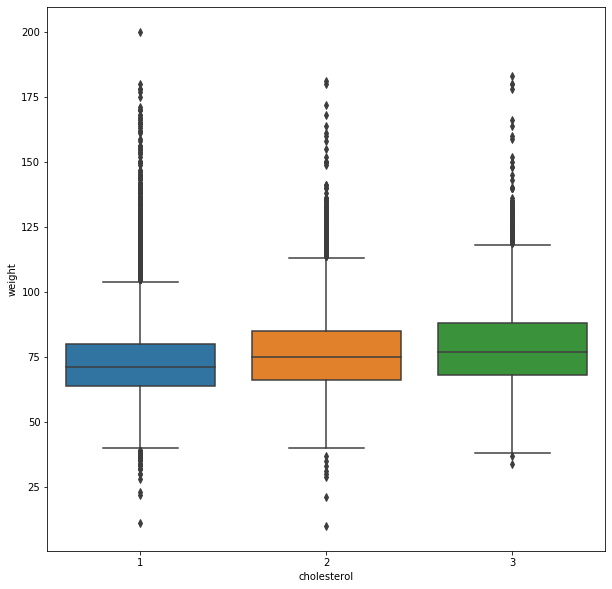

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='cholesterol',y='weight',data=dataset)

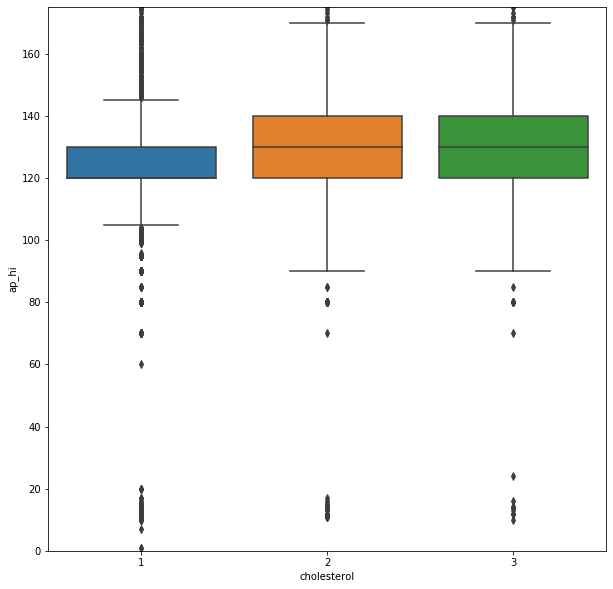

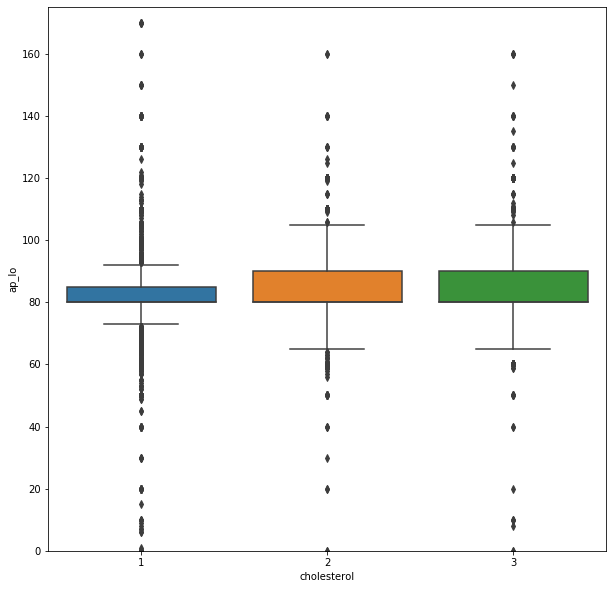

In [28]:
for feature in ['ap_hi','ap_lo']:
    dataset=data.copy()
    plt.figure(figsize=(10,10))
    sns.boxplot(x='cholesterol',y=feature,data=dataset)
    plt.ylim(0,175)

# clearly as ap_lo and ap_hi increases the cholestrol level also increases.

# since all the features here are either int or float so the best feature selection technique would be correlation only. we can also verify it by using statistical tests (ANOVA,CHISQUARE,T-TEST etc.)

In [20]:
cardio_corr=data.corr()['cardio']
cardio_corr.abs().sort_values(ascending=False)[1:]

age            0.237909
cholesterol    0.220752
weight         0.182094
gluc           0.089062
ap_lo          0.065290
ap_hi          0.054211
active         0.035592
smoke          0.015225
height         0.011015
gender         0.008592
alco           0.007217
Name: cardio, dtype: float64

# we can also plot correlation heatmap for this

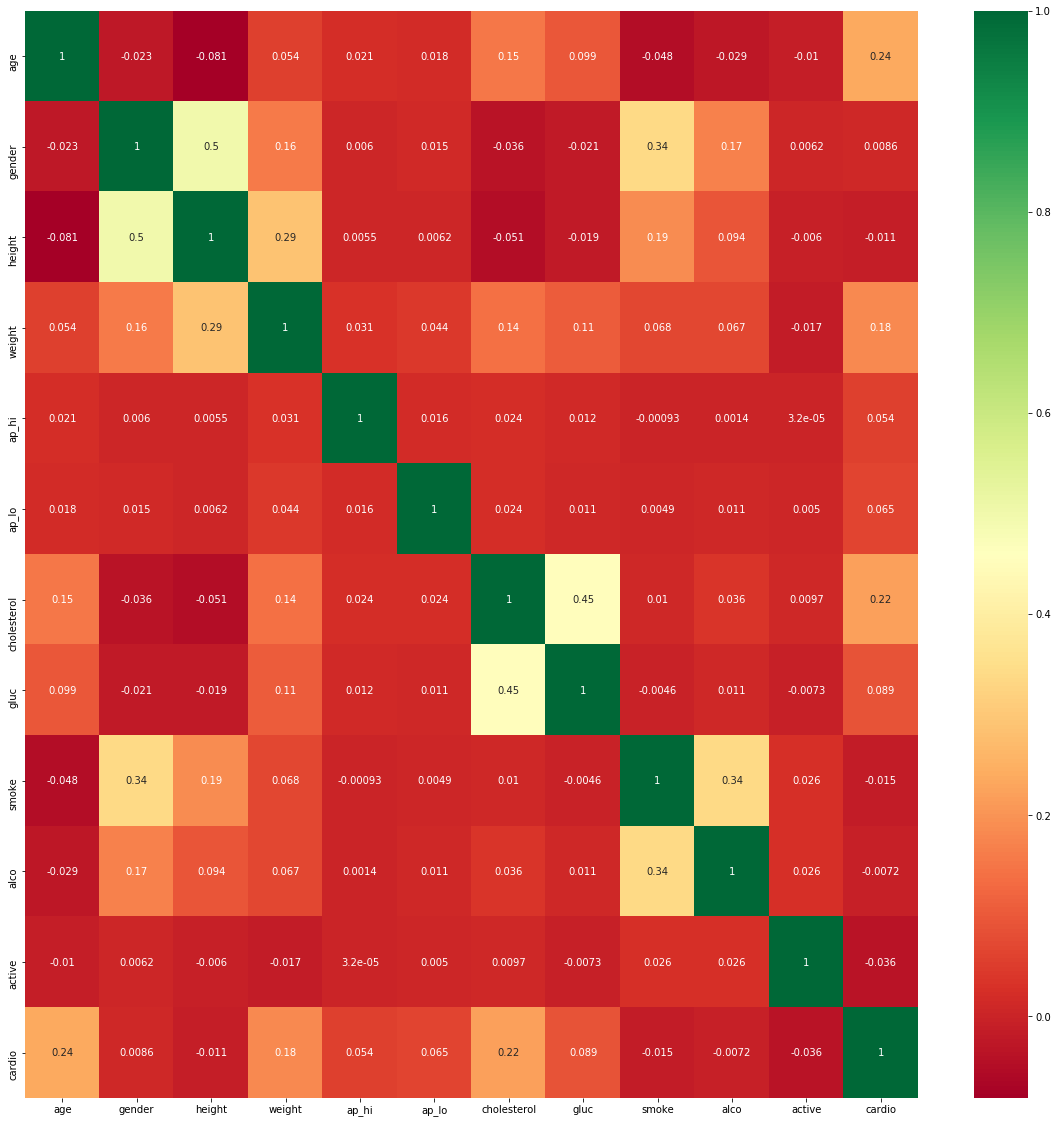

In [21]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# since no feature is correlated to ech other .Hence there is no chance of multicolinearity

In [22]:
from sklearn.ensemble import ExtraTreesClassifier


In [23]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [24]:
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
print(model.feature_importances_)

[0.14412613 0.00624771 0.22567007 0.23219138 0.19672635 0.12110468
 0.04782265 0.01223733 0.00451441 0.00439106 0.00496823]


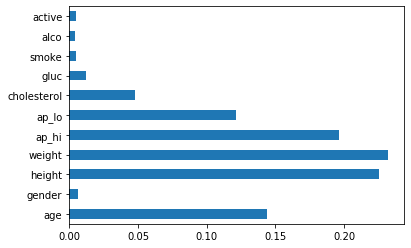

In [26]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.plot(kind='barh')

# now comparing this with correlation i would like to drop a few column which shows no effect in both the tests,namely,gender. Although gluc,active are low on the feature impotance test using Extra tree, but they releatively high on correlation.

In [27]:
data.drop(columns=['gender'],inplace=True)

In [28]:
data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,155,69.0,130,80,2,2,0,0,1,0
1,40,163,71.0,110,70,1,1,0,0,1,1
2,60,165,70.0,120,80,1,1,0,0,1,0
3,39,165,85.0,120,80,1,1,1,1,1,0
4,64,155,62.0,120,80,1,1,0,0,1,0


In [29]:
X=data.iloc[:,:5].values
y=data.iloc[:,-1].values


In [30]:
data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,155,69.0,130,80,2,2,0,0,1,0
1,40,163,71.0,110,70,1,1,0,0,1,1
2,60,165,70.0,120,80,1,1,0,0,1,0
3,39,165,85.0,120,80,1,1,1,1,1,0
4,64,155,62.0,120,80,1,1,0,0,1,0


In [31]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score

In [33]:
base_models=[('DT_model',DecisionTreeClassifier(random_state=42)),
             ('RF_model',RandomForestClassifier(random_state=42,n_jobs=-1)),
             ('LR_model',LogisticRegression(random_state=42,n_jobs=-1)),
             ('XGB_model',XGBClassifier(random_state=42,n_jobs=-1))]
kfolds=10
split=KFold(n_splits=kfolds,shuffle=True,random_state=42)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
for name,model in base_models:
    model_steps=Pipeline(steps=[('model',model)])
    cv_results=cross_val_score(model_steps,X,y,cv=split,n_jobs=-1,scoring='accuracy')
    min_score=round(np.min(cv_results),4)
    max_score=round(np.max(cv_results),4)
    mean_score=round(np.mean(cv_results),4)
    std_dev=round(np.std(cv_results),4)
    print(f"{name} cross validation accuracy score is:{mean_score} +/-{std_dev} min:{min_score} max:{max_score}")

DT_model cross validation accuracy score is:0.638 +/-0.0047 min:0.631 max:0.6473
RF_model cross validation accuracy score is:0.7058 +/-0.0027 min:0.7017 max:0.7098
LR_model cross validation accuracy score is:0.705 +/-0.0058 min:0.6939 max:0.7131


C:\Users\vedan\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGB_model cross validation accuracy score is:0.7368 +/-0.0039 min:0.7286 max:0.7417


# now that we know that xg boost is the bet fitting model for this lets focus on it

In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
classifier=XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
y_pred=classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8013 2359]
 [3163 7256]]


In [41]:
accuracies=cross_val_score(classifier,X=X_train,y=y_train,cv=10)
print(accuracies.mean())
print(classification_report(y_test,y_pred))

0.7359925788497217
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10372
           1       0.75      0.70      0.72     10419

    accuracy                           0.73     20791
   macro avg       0.74      0.73      0.73     20791
weighted avg       0.74      0.73      0.73     20791



In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
new_classifier=XGBClassifier()
rf_parameters={'max_depth':[3,5,7,10,15],'n_estimators':[50,60,70,80,90,100],'learning_rate':[0.1,0.3,0.5,0.7,0.9]}
rs_model=RandomizedSearchCV(new_classifier,rf_parameters,cv=10,n_jobs=-1)

In [44]:
rs_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='d

In [45]:
print('Best parameters: ' + str(rs_model.best_params_))

Best parameters: {'n_estimators': 70, 'max_depth': 3, 'learning_rate': 0.5}


In [46]:
classifier=XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=60)
classifier.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
cm_new=confusion_matrix(y_test,y_pred)
print(cm)

[[8013 2359]
 [3163 7256]]


In [49]:
accuracies=cross_val_score(classifier,X=X_train,y=y_train,cv=10)
accuracies.mean()


0.7365697794269221

# we see there is minimal difference with respect to the parameters tuning

In [50]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75     10372
           1       0.76      0.69      0.72     10419

    accuracy                           0.73     20791
   macro avg       0.74      0.73      0.73     20791
weighted avg       0.74      0.73      0.73     20791



# HERE THE RECALL HAS BEEN BOOSTED AS WE HAVE TO FOCUS PRIMARILY ON FALSE NEGATIVES IF A PERSON IS TESTED NEGATIVE BUT IS POSITIVE OS MORE HARMFUL THAN A FALSE POSITIVE.